In [1]:
import os.path as op
import csv

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components

from pyvis.network import Network
import networkx as nx
import snap

pd.set_option('display.max_rows', None)

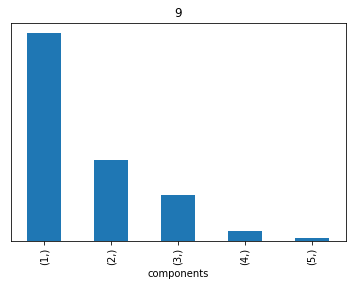

In [2]:
# Simulation to select the appropriate number of active symptom

data = pd.read_csv('./scl_data.csv')
data = data.dropna(axis=1, how='all')
data = data.dropna().reset_index(drop=True)



for number in range(1, 10):
    data1 = data.reset_index(drop=True)
    
    maxCol = pd.DataFrame(data1.columns.values[np.argsort(-data1.values, axis=1)[:, :number]], index=None)
    getMatrix = pd.read_csv('./scl_network_all.csv', index_col='Unnamed: 0')
    getTriu = pd.DataFrame(np.triu(getMatrix), index= getMatrix.columns)
    getTriu.columns = getMatrix.columns

    df = data1
    df['components'] = 0

    for i in range(0, data1.shape[0]):
        sublist = maxCol.iloc[i].tolist()
        subset = getTriu[sublist]
        subset = subset.loc[sublist]
        graph = csr_matrix(subset)
        n_components, labels = connected_components(csgraph=graph, directed=False, return_labels=True)
        df.at[i, 'components'] = n_components
        
    
    ax = df[['components']].value_counts().plot(kind="bar", title = number)
    ax.axes.yaxis.set_visible(False)
    #ax.figure.savefig('./simulation/'+str(number)+'.png')

In [3]:
corr_graph = nx.from_pandas_adjacency(getTriu)
pos = nx.spring_layout(corr_graph)
edges = [(a,b) for (a,b) in corr_graph.edges() if a != b]
    
def vis(number):
    plt.figure(1,figsize=(25,25))  
    plt.title(number, fontsize=30, ha='center')

    color_map = []
    ecolor_map = []
    
    for node in getTriu.columns:
        if node in maxCol.loc[number].values:
            color_map.append('#C85C5C')
        else: 
            color_map.append('#C3E2DF')  

    for edge in edges:
        if (edge[0] in maxCol.loc[number].values and edge[1] in maxCol.loc[number].values):
            ecolor_map.append('#C85C5C')
        else: 
            ecolor_map.append('#E2E2E2')  
    
    nx.draw(corr_graph, node_size = 500, node_color=color_map, edge_color= ecolor_map, with_labels = False)

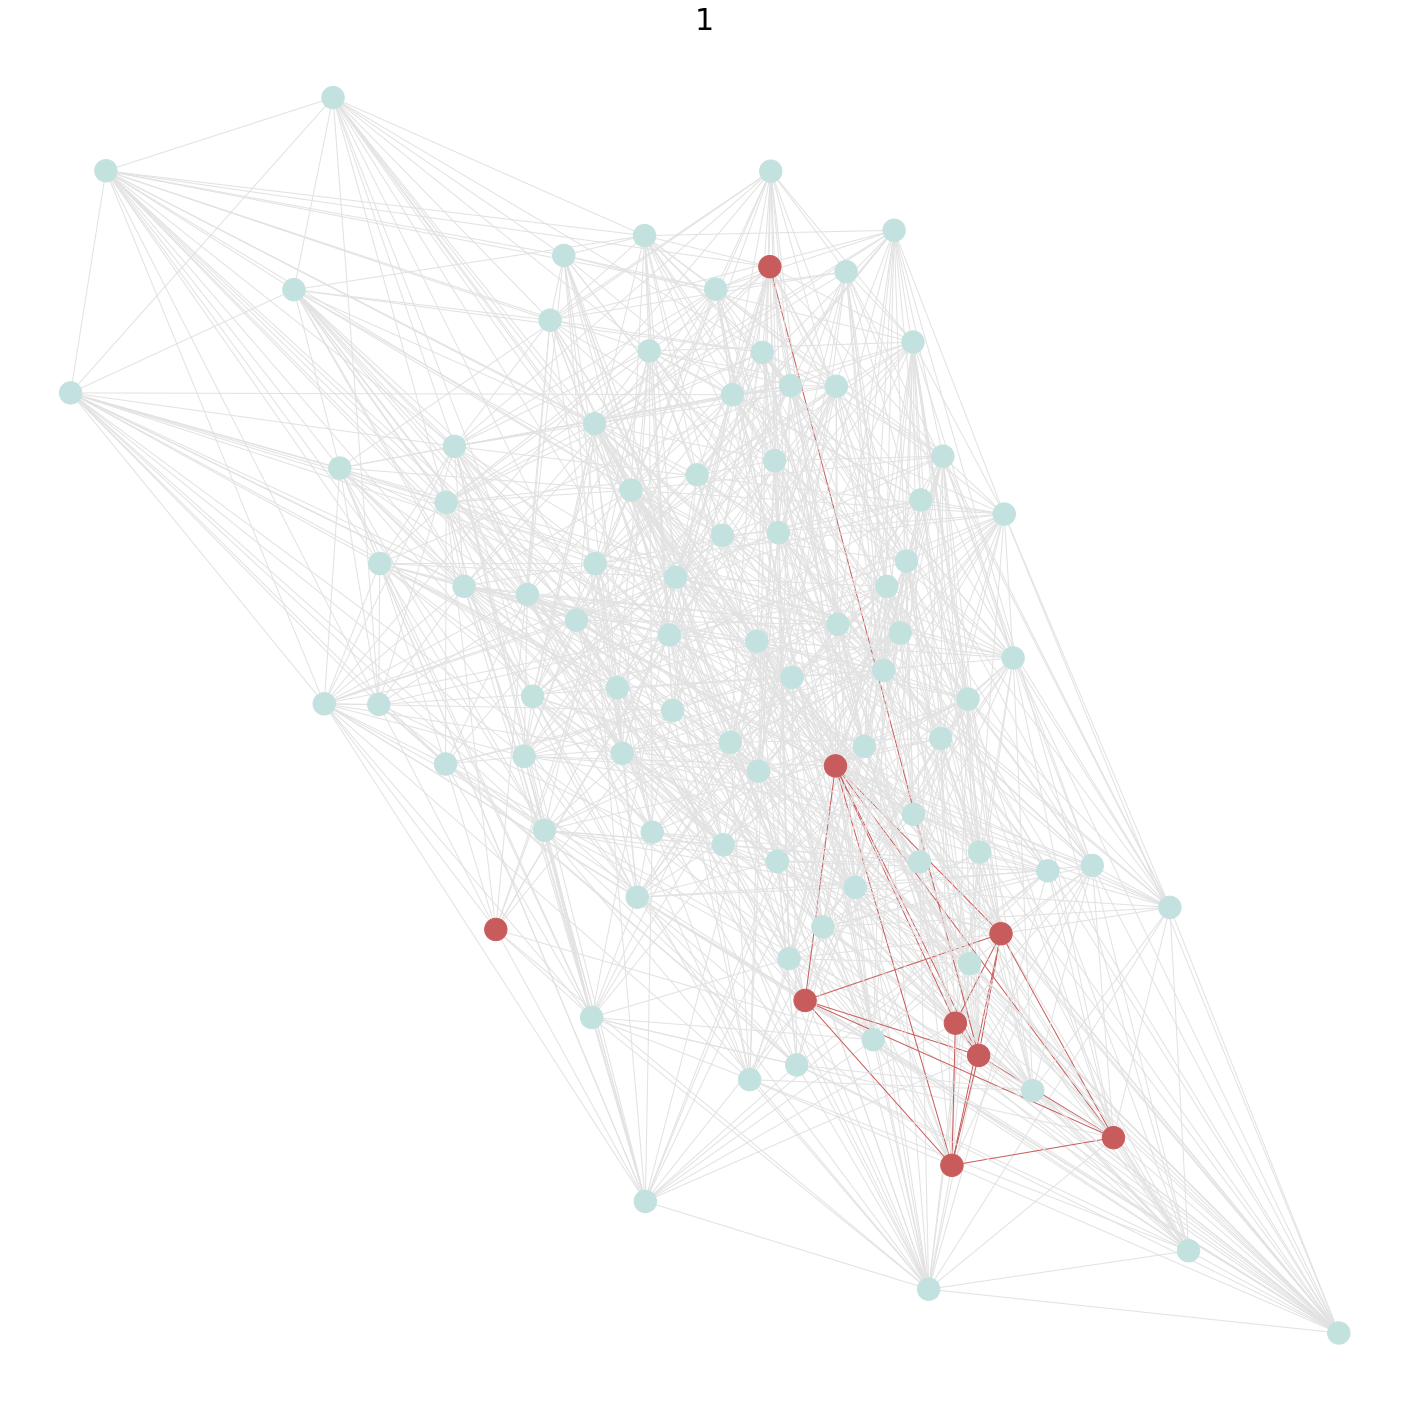

In [4]:
vis(1) # Visualization of [#number]patient's  active symptoms

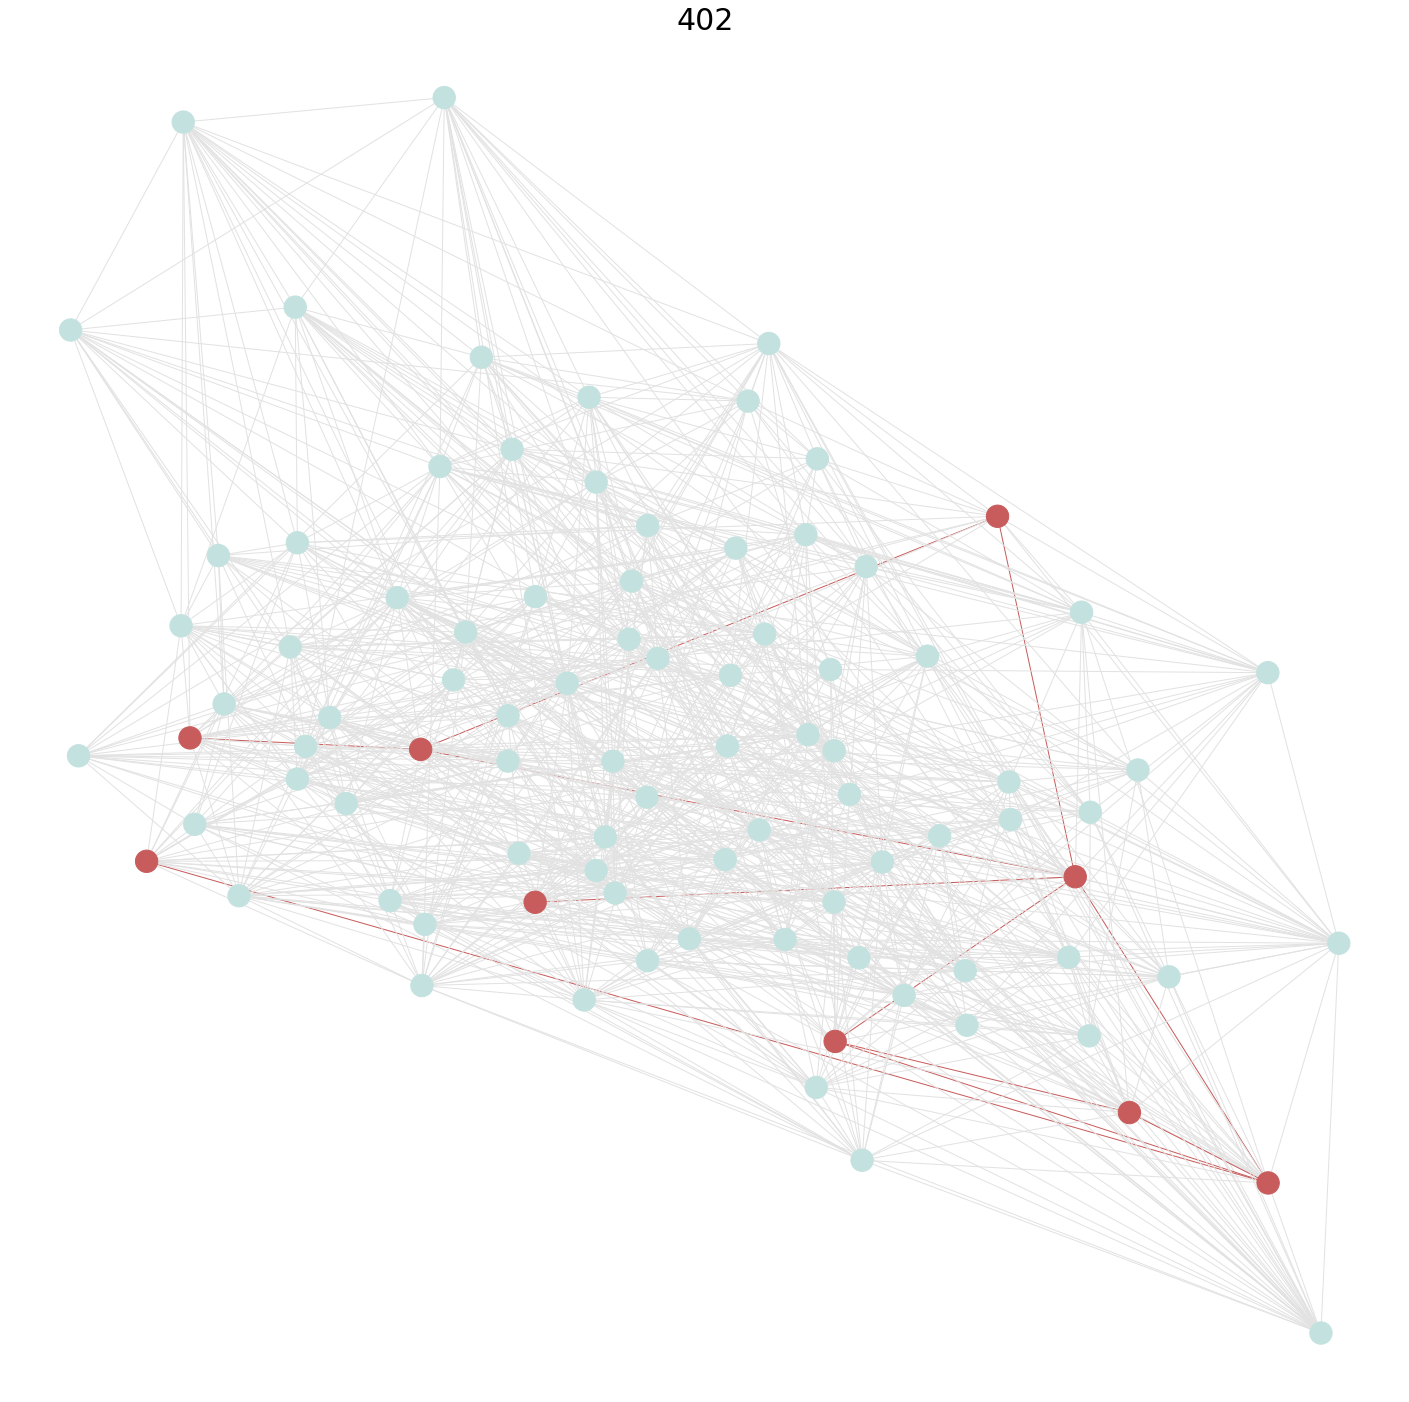

In [5]:
vis(402)